# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [914]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [915]:
# Add any additional import statements you need here
import string
import matplotlib 
import emoji

In [916]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/Luis Perez/Documents/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [917]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = len(set(tokens)) / len(tokens)
    num_characters = sum(len(token)for token in tokens)
    #x=sum([len(songs) for songs in cleaned_lyrics['cher'].values()])

    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [918]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion are useful for both documentation and debugging code. They are most commonly used in testing and user validation. What I understand you want to use them in your code when you want easy to undestand code.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [919]:
# Read in the lyrics data
#data_location = "/Users/Luis Perez/Documents/lyrics"

lyrics = {}

# Define the artist names and file paths
artists = {
    'cher': '/Users/Luis Perez/Documents/lyrics/cher',
    'robyn': '/Users/Luis Perez/Documents/lyrics/robyn'
}

for artist_name, artist_path in artists.items():
    artist_lyrics = {}
    # loop over files on artist folder
    for file in os.listdir(artist_path):
        #  if lyrics file ends with .txt
        if file.endswith(".txt"):
            song_name = file.split("_")[-1].split(".")[0]
            with open(os.path.join(artist_path, file), 'r') as f:
                artist_lyrics[song_name] = f.read()
    
    lyrics[artist_name] = artist_lyrics

In [920]:
# Read in the twitter data

artists = {
    'cher': [],
    'robyn': [],
}
for file in os.listdir("/Users/Luis Perez/Documents/twitter"):
    # first part of checking .txt file
    if file.endswith("robynkonichiwa_follower_data.txt"):
        with open(os.path.join("/Users/Luis Perez/Documents/twitter", file), 'r', encoding="utf-8") as f:
            csvFile = csv.DictReader(f, delimiter='\t')
            for row in csvFile:
                if 'description' in row:
                    artists['robyn'].append(row['description'])
    # second part of checking .txt filer cher
    elif file.endswith("cher_follower_data.txt"):
        with open(os.path.join("/Users/Luis Perez/Documents/twitter", file), 'r', encoding="utf-8") as f:
            csvFile = csv.DictReader(f, delimiter='\t')
            for row in csvFile:
                if 'description' in row:
                    artists['cher'].append(row['description'])

                            
                    
               

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [921]:
punctuation = set(punctuation) # speeds up comparison

In [922]:
# create your clean twitter data here


def twitter_clean_and_tokenize(text):
    
    #punctuation characters except #'s'
    text_without_hash = string.punctuation.replace("#", "")
    trans_table = str.maketrans("", "", text_without_hash)

    #remove punctuation
    text = text.translate(trans_table)
    
    #split on whitespace
    tokens= text.split()
    
    
    # Convert the text to lowercase
    text = text.lower()
    
    #remove stopwords 
    stop_words = set(stopwords.words('english'))
    rm_stopwords= [token for token in tokens if token not in stop_words]
    
    return rm_stopwords 

# Iterate over the artists and their descriptions
for artist, descriptions in artists.items():
    cleaned_descriptions = []
    for description in descriptions:
        if description:  # check if empty
            cleaned_descriptions.append(twitter_clean_and_tokenize(description))
    artists[artist] = cleaned_descriptions

In [923]:
#loop to access the dictionary inner lists values
cher_clyrics_tokens = []
for artist, songs in cleaned_lyrics.items():
     if artist == "cher":
        for song,song_list in songs.items():
            cher_clyrics_tokens += song_list
            
robyn_clyrics_tokens = []
for artist, songs in cleaned_lyrics.items():
     if artist == "robyn":
        for song,song_list in songs.items():
            robyn_clyrics_tokens += song_list

In [924]:
#was having trouble using list of list so decided to flatten lists
cher_twitter_flat_tokens = [artists['cher'] for sublist in artists['cher'] for artists['cher'] in sublist]
robyn_twitter_flat_tokens = [artists['robyn'] for sublist in artists['robyn'] for artists['robyn'] in sublist]




In [925]:
# create your clean lyrics data here

def lyrics_clean_and_tokenize(text):
    
    # Remove punctuation characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    #split on whitespace
    tokens= text.split()
    
    
    # Convert the text to lowercase
    text = text.lower()
    
    #remove stopwords 
    stop_words = set(stopwords.words('english'))
    rm_stopwords= [token for token in tokens if token not in stop_words]
    
    return rm_stopwords 

cleaned_lyrics= {}
cleaned_lyrics2= {}

for artist, artist_lyrics in lyrics.items():
    cleaned_lyrics[artist] = {}
    for song,song_lyrics in artist_lyrics.items():
        if song_lyrics:  # check if lyrics is not empty
            cleaned_lyrics[artist][song]= lyrics_clean_and_tokenize(song_lyrics)
            cleaned_lyrics2[song]= lyrics_clean_and_tokenize(song_lyrics)
    

 

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [926]:
# calls to descriptive_stats here

#twitter section
print("\nTwitter descriptions for: Cher")
assert(descriptive_stats(cher_twitter_flat_tokens, verbose=True))
print("\nTwitter descriptions for: Robyn")
assert(descriptive_stats(robyn_twitter_flat_tokens, verbose=True))

#lyrics section
print("\nlyrics descriptions for: Cher")
assert(descriptive_stats(cher_clyrics_tokens, verbose=True))
print("\nlyrics descriptions for: Robyn")
assert(descriptive_stats(robyn_clyrics_tokens, verbose=True))






Twitter descriptions for: Cher
There are 235394 tokens in the data.
There are 73153 unique tokens in the data.
There are 1372841 characters in the data.
The lexical diversity is 0.311 in the data.

Twitter descriptions for: Robyn
There are 291103 tokens in the data.
There are 88463 unique tokens in the data.
There are 1750339 characters in the data.
The lexical diversity is 0.304 in the data.

lyrics descriptions for: Cher
There are 44652 tokens in the data.
There are 4647 unique tokens in the data.
There are 193719 characters in the data.
The lexical diversity is 0.104 in the data.

lyrics descriptions for: Robyn
There are 18229 tokens in the data.
There are 2591 unique tokens in the data.
There are 81176 characters in the data.
The lexical diversity is 0.142 in the data.


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If we left stopwords in the data the top 5 might consists only stopwords like of: 'a','the','are','is', 'and'

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior beliefs about the lexical diversity was that their works would contain similar words in their lyrics. In other words, I was expecting that their lexical diversity would be in the lower numbers as artists do not tend to divert to much of their proven formulas---song writing, topics,etc--- according to a quick search a lexically dense text would be around 56%. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [927]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [928]:

#emoji calc for robyn

# list of twitter descriptions
flat_tokens

n = 10
# create an empty dictionary to store the emojis and their frequencies
emoji_freq = {}

for description in flat_tokens:
    #unicode for the emojis
    desc = emoji.emojize(description)
    for char in desc:
        if emoji.is_emoji(char):
            if char in emoji_freq:
                emoji_freq[char] += 1
            else:
                emoji_freq[char] = 1

# sort the dict by desc order
sorted_emoji = dict(sorted(emoji_freq.items(), key=lambda x: x[1], reverse=True))

#top 10 most common emojis
robyn_top_n_emoji = dict(list(sorted_emoji.items())[:n])

#emoji calc for cher
n = 10
emoji_freq = {}

for description in flat_tokens2:
    desc = emoji.emojize(description)
    for char in desc:
        if emoji.is_emoji(char):
            if char in emoji_freq:
                emoji_freq[char] += 1
            else:
                emoji_freq[char] = 1

# sort the dict by desc order
sorted_emoji = dict(sorted(emoji_freq.items(), key=lambda x: x[1], reverse=True))

#top 10 most common emojis
cher_top_n_emoji = dict(list(sorted_emoji.items())[:n])



In [929]:
# output the top n most common emojis
print("Cher's top 10 emojis used in their their followers' descriptions")
print(cher_top_n_emoji)

print("\nRobyn's top 10 emojis used in their their followers' descriptions")
print(robyn_top_n_emoji)

Cher's top 10 emojis used in their their followers' descriptions
{'🌈': 2184, '🏳': 1748, '❤': 835, '✨': 767, '🏻': 501, '🏼': 359, '💙': 339, '💜': 338, '🎶': 268, '🏽': 265}

Robyn's top 10 emojis used in their their followers' descriptions
{'❤': 1176, '🌈': 950, '🏳': 810, '💙': 659, '✨': 587, '🏻': 448, '💜': 357, '🖤': 343, '🌊': 326, '🏼': 309}


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [930]:
#Hastags for Cher
hashtags = [s for s in cher_twitter_flat_tokens if s.startswith("#")]
hashtags = [s.lower() for s in hashtags]
counts_hastags = Counter(hashtags)
cher_top_10 = counts_hastags.most_common(10)


print("Top 10 #'s for Cher:")
cher_top_10




Top 10 #'s for Cher:


[('#blm', 130),
 ('#resist', 82),
 ('#blacklivesmatter', 61),
 ('#1', 53),
 ('#voteblue', 50),
 ('#lgbtq', 26),
 ('#bluecrew', 26),
 ('#', 24),
 ('#fbr', 20),
 ('#prochoice', 19)]

In [931]:
#Hastags for Robyn
robyn_hashtags = [s for s in robyn_twitter_flat_tokens if s.startswith("#")]
robyn_hashtags = [s.lower() for s in robyn_hashtags]
r_counts_hastags = Counter(robyn_hashtags)
robyn_top_10 = r_counts_hastags.most_common(10)

print("Top 10 #'s for Robyn:")
robyn_top_10


Top 10 #'s for Robyn:


[('#blacklivesmatter', 212),
 ('#blm', 137),
 ('#1', 61),
 ('#music', 45),
 ('#resist', 32),
 ('#lgbtq', 27),
 ('#translivesmatter', 27),
 ('#freepalestine', 25),
 ('#blacktranslivesmatter', 20),
 ('#actuallyautistic', 19)]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [932]:
#grabing all the songs titles from the lyrics dict "song title (with spaces)"
new_list = {}
for key, value in lyrics['cher'].items():
    value_list = re.findall(r'"([^"]*)"', value)
    new_list[key] = value_list
    
#loop all the song titles to find top words
all_words = []
for key, value in new_list.items():
    for song in value:
        all_words += song.split()
        
common_words = Counter(all_words).most_common(5)
print("Top 5 words in Cher's song titles are: \n" + str(common_words))

Top 5 words in Cher's song titles are: 
[('The', 54), ('I', 45), ('You', 40), ('Love', 38), ('To', 28)]


In [933]:
#grabing all the songs titles from the lyrics dict "song title (with spaces)"
new_list = {}
for key, value in lyrics['robyn'].items():
    value_list = re.findall(r'"([^"]*)"', value)
    new_list[key] = value_list
    
#loop all the song titles to find top words
all_words = []
for key, value in new_list.items():
    for song in value:
        all_words += song.split()
        
common_words = Counter(all_words).most_common(5)
print("Top 5 words in Robyn's song titles are: \n" + str(common_words))

Top 5 words in Robyn's song titles are: 
[('Me', 11), ('You', 8), ('The', 8), ('My', 8), ('be', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

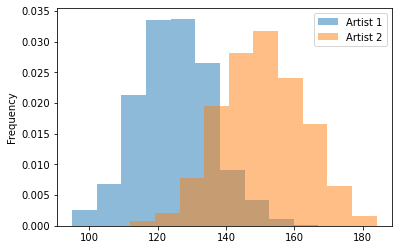

In [934]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

In [935]:
#total tokens by per song per artist 
artists_clyrics_tokens = []
artists = ["cher", "robyn"]
for artist, songs in cleaned_lyrics.items():
    if artist in artists:
        for song,song_list in songs.items():
            song_info = {'artist':artist, 'length':len(song_list)}
            artists_clyrics_tokens.append(song_info)
df = pd.DataFrame(artists_clyrics_tokens)



artist
cher     AxesSubplot(0.125,0.125;0.775x0.755)
robyn    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

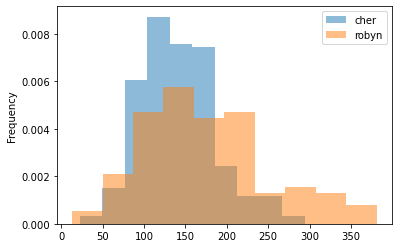

In [936]:
df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: This will match on white space (spaces between words, tabs) and the + sign indicates that eithe one or more should be matched. 


In [937]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])